In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from dataloader.dataloader import ListDataset
from dataloader.augmentations import AugmentAlbumentations, ResizeAlbumentations


def load_classes(path):
    """
    Loads class labels at 'path'
    """
    with open(path, "r") as fp:
        names = fp.read().splitlines()
    return names


dataset = ListDataset(
    list_path="../data/train.txt",
    transform=AugmentAlbumentations(size=640),
)
classes = load_classes("../data/coco.names")

org_dataset = ListDataset(
    list_path="../data/train.txt",
    transform=ResizeAlbumentations(size=640),
)


def plot_box(img, boxes):
    labels = [classes[int(i)] for i in boxes[:, 0]]
    img = img.permute(1,2,0).numpy()
    fig = plt.imshow(img)

    dh, dw, _ = img.shape
    for i, box in enumerate(boxes[:, 1:]):
        x, y, w, h = box[0] * dw, box[1] * dh, box[2] * dw, box[3] * dh
        # print("x {}, y {}, w {}, h {}".format(x, y, w, h))
        x1 = int((x - w / 2))
        x2 = int((x + w / 2))
        y1 = int((y - h / 2))
        y2 = int((y + h / 2))
        # print("x1 {}, x2 {}, y1 {}, y2 {}".format(x1, x2, y1, y2))
        bbox = plt.Rectangle(xy=(x1, y1), width=w, height=h, fill=False, edgecolor='red', linewidth=2)

        fig.axes.add_patch(bbox)
        fig.axes.text(x1, y1, labels[i], color='white', verticalalignment='top')

    plt.show()
    return None

/home/loch/miniconda3/envs/YOLO/lib/python3.8/site-packages/albumentations/augmentations/dropout/cutout.py:49: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(
Data: /home/loch/Project/Pytorch-YOLO/data/coco128/images/train2017/000000000508.jpg or .txt is not existed. Drop it!
Data: /home/loch/Project/Pytorch-YOLO/data/coco128/images/train2017/000000000250.jpg or .txt is not existed. Drop it!
Background images: there are 1.56% background images are removed. 
Data: /home/loch/Project/Pytorch-YOLO/data/coco128/images/train2017/000000000508.jpg or .txt is not existed. Drop it!
Data: /home/loch/Project/Pytorch-YOLO/data/coco128/images/train2017/000000000250.jpg or .txt is not existed. Drop it!
Background images: there are 1.56% background images are removed. 


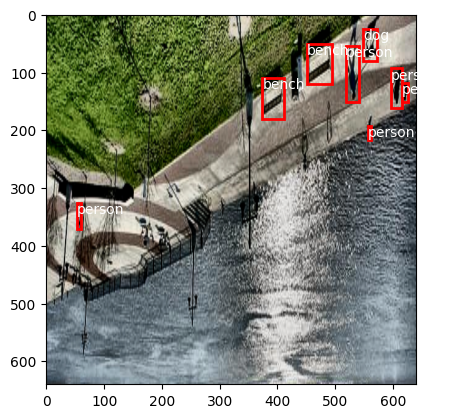

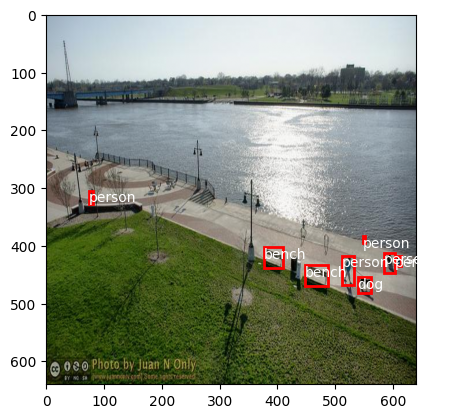

In [3]:
index = np.random.choice(range(len(dataset)), size=1)[0]
img, boxes = dataset.__getitem__(index)
plot_box(img, boxes)
img, boxes = org_dataset.__getitem__(index)
plot_box(img, boxes)